In [1]:
import numpy as np
import time
import sys
import os
import random
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle as BBox

The first thing to do is prepare the images and labels.

In [82]:
anno_path = "/home/simon/PycharmProjects/ObjectDetection/data/Rotated/train/annotations/"
image_path = "/home/simon/PycharmProjects/ObjectDetection/data/Rotated/train/images/"

In [83]:
data = pd.read_csv(os.path.join(anno_path, "10x_raw_train.csv"))
data.head()

,,Label,BX,BY,Width,Height
0,1,BCC_1.png,78,88,6,7
1,2,BCC_1.png,194,100,8,7
2,3,BCC_10.png,35,103,8,8
3,4,BCC_10.png,225,100,6,8
4,5,BCC_13.png,50,87,8,8


In [84]:
# Drop first column
data = data.drop(" ", axis=1)

In [85]:
data.head()

,Label,BX,BY,Width,Height
0,BCC_1.png,78,88,6,7
1,BCC_1.png,194,100,8,7
2,BCC_10.png,35,103,8,8
3,BCC_10.png,225,100,6,8
4,BCC_13.png,50,87,8,8


Now we want to make all of Width and Height = 10 so that they are standard size.


In [86]:
data["Width"] = [10]*108
data["Height"] = [10]*108

In [87]:
data.head()

,Label,BX,BY,Width,Height
0,BCC_1.png,78,88,10,10
1,BCC_1.png,194,100,10,10
2,BCC_10.png,35,103,10,10
3,BCC_10.png,225,100,10,10
4,BCC_13.png,50,87,10,10


Now we have to add the values of width and height to their respective x and y values, so we get the top left and bottom right corners of the bounding boxes.

In [88]:
data["Width"] = data["Width"] + data["BX"]
data["Height"] = data["Height"] + data["BY"]

In [89]:
data.head()

,Label,BX,BY,Width,Height
0,BCC_1.png,78,88,88,98
1,BCC_1.png,194,100,204,110
2,BCC_10.png,35,103,45,113
3,BCC_10.png,225,100,235,110
4,BCC_13.png,50,87,60,97


Now we want to standardise them to the image size, which in this case is 256px. This should then make them work for all sizes of the image that were re-orientated in the same way e.g. relative padding, squareness etc.

In [90]:
#data["BX"] /= 256
#data["BY"] /= 256
#data["Width"] /= 256
#data["Height"] /= 256

In [92]:
#data.head()

Next we want to Add the `ClassName` column on the end.

In [93]:
data["ClassName"] = ["Margin", "Margin"]*54 # Make them all the same 
data.head()

,Label,BX,BY,Width,Height,ClassName
0,BCC_1.png,78,88,88,98,Margin
1,BCC_1.png,194,100,204,110,Margin
2,BCC_10.png,35,103,45,113,Margin
3,BCC_10.png,225,100,235,110,Margin
4,BCC_13.png,50,87,60,97,Margin


We must also rename the columns to `FileName	XMin	XMax	YMin	YMax	ClassName`

In [94]:
data.columns = ["FileName", "X1", "Y1", "X2", "Y2", "ClassName"]
data.head()

,FileName,X1,Y1,X2,Y2,ClassName
0,BCC_1.png,78,88,88,98,Margin
1,BCC_1.png,194,100,204,110,Margin
2,BCC_10.png,35,103,45,113,Margin
3,BCC_10.png,225,100,235,110,Margin
4,BCC_13.png,50,87,60,97,Margin


Finally we can prepend the directory for where the files live

In [95]:
data["FileName"] = image_path  + data["FileName"]

In [96]:
data.head()

,FileName,X1,Y1,X2,Y2,ClassName
0,/home/simon/PycharmProjects/ObjectDetection/da...,78,88,88,98,Margin
1,/home/simon/PycharmProjects/ObjectDetection/da...,194,100,204,110,Margin
2,/home/simon/PycharmProjects/ObjectDetection/da...,35,103,45,113,Margin
3,/home/simon/PycharmProjects/ObjectDetection/da...,225,100,235,110,Margin
4,/home/simon/PycharmProjects/ObjectDetection/da...,50,87,60,97,Margin


Of course, we want to save it!

In [97]:
fname = os.path.join(anno_path, "train.csv")
data.to_csv(fname, index=None)

Finally, we can show a bounding box

In [98]:
img = io.imread(data["FileName"][0])

In [99]:
# West
x = data["X1"][0] #* 256
y = data["Y1"][0] #* 256
width = (data["X2"][0] - data["X1"][0]) #* 256
height = (data["Y2"][0] - data["Y1"][0]) #* 256
bbox1 = BBox((x, y), width, height, linewidth=1,edgecolor='green',facecolor='none', label="West")

# East
x = data["X1"][1] #* 256
y = data["Y1"][1] #* 256
width = (data["X2"][1] - data["X1"][1]) #* 256
height = (data["Y2"][1] - data["Y1"][1]) #* 256
bbox2 = BBox((x, y), width, height, linewidth=1, edgecolor='red',facecolor='none', label="East")

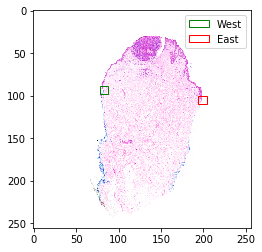

In [100]:
fig,ax = plt.subplots(1,1,  figsize=(4,4))
ax.imshow(img)
ax.add_patch(bbox1)
ax.add_patch(bbox2)
plt.legend()
plt.show()